# Homework 3 - Duc Trinh 

In [1]:
import pandas as pd

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import numpy as np

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [5]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [36]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## Exercise 1 

### a) 

In [6]:
redWine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter = ";")

In [7]:
redWine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
numeric_data = redWine.values

In [9]:
numeric_data

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [10]:
numeric_data.shape

(1599, 12)

In [11]:
wine_labels = np.zeros(len(numeric_data))
for i in range(len(numeric_data)):
    if (numeric_data[i][11] >= 7):
        wine_labels[i] = 1
    else:
        wine_labels[i] = 0
wine_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
wine_attrs = np.delete(numeric_data, 11, 1)
wine_attrs

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

### b)

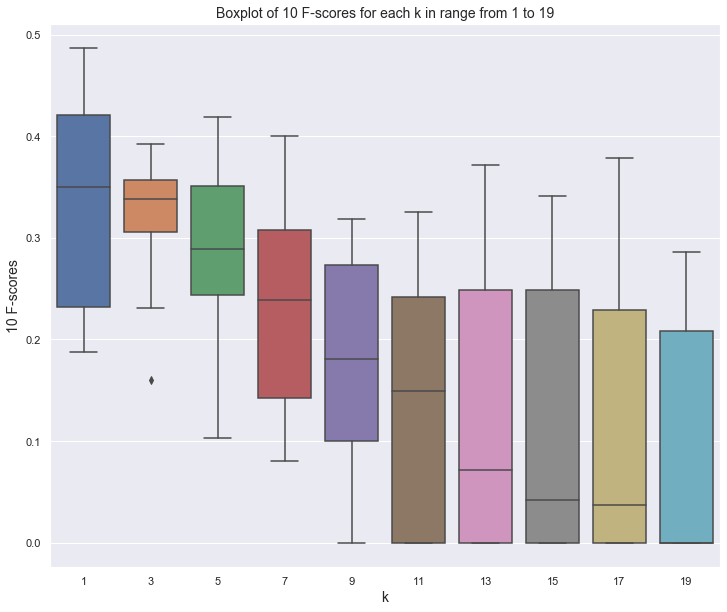

In [53]:
plt.figure(figsize = (12, 10))
plt.title(label = "Boxplot of 10 F-scores for each k in range from 1 to 19", fontsize = 14)
plt.xlabel(xlabel = "k", fontsize = 14)
plt.ylabel(ylabel = "10 F-scores", fontsize = 14)
_ = sns.boxplot(x=list(range (1, 21, 2)), y=[cross_val_score(KNeighborsClassifier(n_neighbors=k,metric="euclidean"), X = wine_attrs, y = wine_labels, cv=10, scoring = 'f1') for k in range (1, 21,2)])

Based on the boxplots, it seems like I should choose k=  1 since it produces the best boxplot of F1-scores (highest max among other k as well as a pretty small range). However, I think k = 1 produces the best F1-scores solely due to it being too sensitive to noises. I would choose k = 3 as it has similar median as the boxplot produced by k = 1, and it has smaller range.

### c)

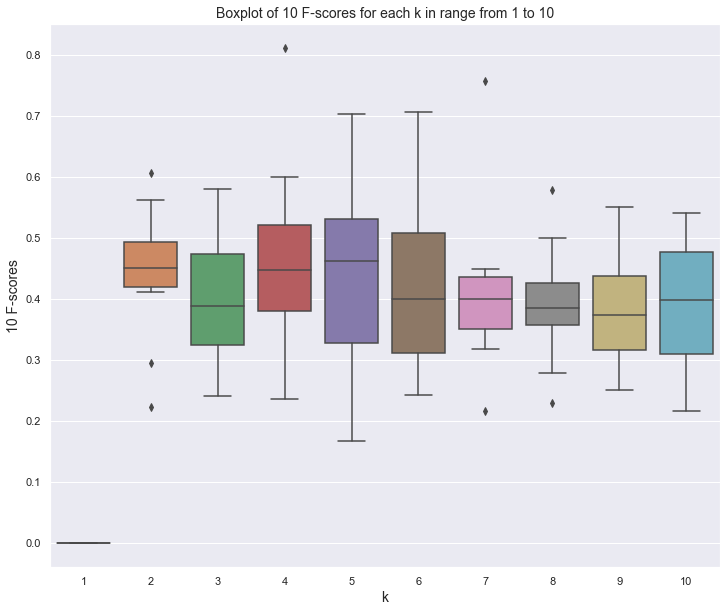

In [60]:
plt.figure(figsize = (12, 10))
plt.title(label = "Boxplot of 10 F-scores for each k in range from 1 to 10", fontsize = 14)
plt.xlabel(xlabel = "k", fontsize = 14)
plt.ylabel(ylabel = "10 F-scores", fontsize = 14)
_ = sns.boxplot(x=list(range (1, 11, 1)), y=[cross_val_score(DecisionTreeClassifier(max_depth = k), X = wine_attrs, y = wine_labels, cv=10, scoring = 'f1') for k in range (1, 11,1)])

I would choose k = 5 since it seems like its classifier produces the best F1-scores (the max of this boxplot is very high as well as high median). For k > 5, the F1-scores seems to be decreasing (their medians are lower and the boxplots shift down). For k < 5, the F1-scores seems to be increasing (their medians are higher and the boxplots shift up). This gives me reason to believe k = 5 gives the classifier the best F1-scores as it seems like this is the break-off point.

## Exercise 2